# TP - prévisions de séries temporelles

In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    print("tensorflow_version failed, i guess you are not in Colab")

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


On génère des séries temporelles. Le but étant de calculer Y en fonction des X précédents.  
On a $Y(t) = X_1(t) + X_2(t) + X_3(t)$  
On cherche à prédire $Y(t) = f(X(t-50), X(t-49), ..., X(t-1)) 

In [ ]:
t = np.linspace(0,9999, 10000)
st1 = np.sin(3 * t) + np.cos(1.2 * t) + np.exp(np.cos(4 * t + 3))
st2 = np.cos(t-1) * st1 - 0.3 * np.cos(2 * t - 2)
st3 = np.sin(t-2) * st2 + 0.4 * np.cos(0.78 * t)

X = np.zeros((9900, 50, 3))
Y = np.zeros((9900,))

for i in range(9900):
    X[i, :, 0] = st1[i: i + 50]
    X[i, :, 1] = st2[i: i + 50]
    X[i, :, 2] = st3[i: i + 50]

    Y[i] = st1[i + 50] + st2[i + 50] + st3[i + 50]

X_train = X[:8000, :, :] 
Y_train = Y[:8000]


X_test = X[8000:, :, :] 
Y_test = Y[8000:]

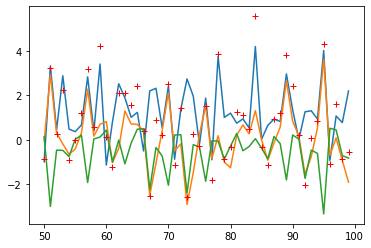

In [ ]:
import matplotlib.pyplot as plt

plt.plot(t[50:100], st1[50:100])
plt.plot(t[50:100], st2[50:100])
plt.plot(t[50:100], st3[50:100])
plt.plot(t[50:100], Y[:50], 'r+')

In [14]:
print((X_train.shape, Y_train.shape))

((8000, 50, 3), (8000,))


In [ ]:
## Première tentative

Cela ne marche pas ... à votre avis, pourquoi ?

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1) 
])

model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9), loss='mse')
model.fit(X_train, Y_train, epochs = 10, validation_data=(X_test, Y_test))

Epoch 1/10
250/250 [==============================] - 0s 2ms/step - loss: 3.4914 - val_loss: 3.4632
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 3.4651 - val_loss: 3.4745
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 3.4736 - val_loss: 3.4595
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 3.4684 - val_loss: 3.4766
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 3.4678 - val_loss: 3.4655
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 3.4721 - val_loss: 3.4684
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 3.4674 - val_loss: 3.4712
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 3.4692 - val_loss: 3.4728
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 3.4655 - val_loss: 3.4789
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 3.4661 - val_loss: 3.4755

## Deuxième tentative

Essayez en utilisant un layer récurrent(SimpleRNN, LSTM, GRU)

In [ ]:
# tf.keras.layers.
model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9), loss='mse')
model.fit(X_train, Y_train, epochs = 10, validation_data=(X_test, Y_test))

## Troisième tentative

Essayez en utilisant deux layer récurrents.  
Quel mot clé est nécessaire ?

In [ ]:

model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9), loss='mse')
model.fit(X_train, Y_train, epochs = 10, validation_data=(X_test, Y_test))